In [136]:
import numpy as np
from scipy.stats import gamma
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import Image

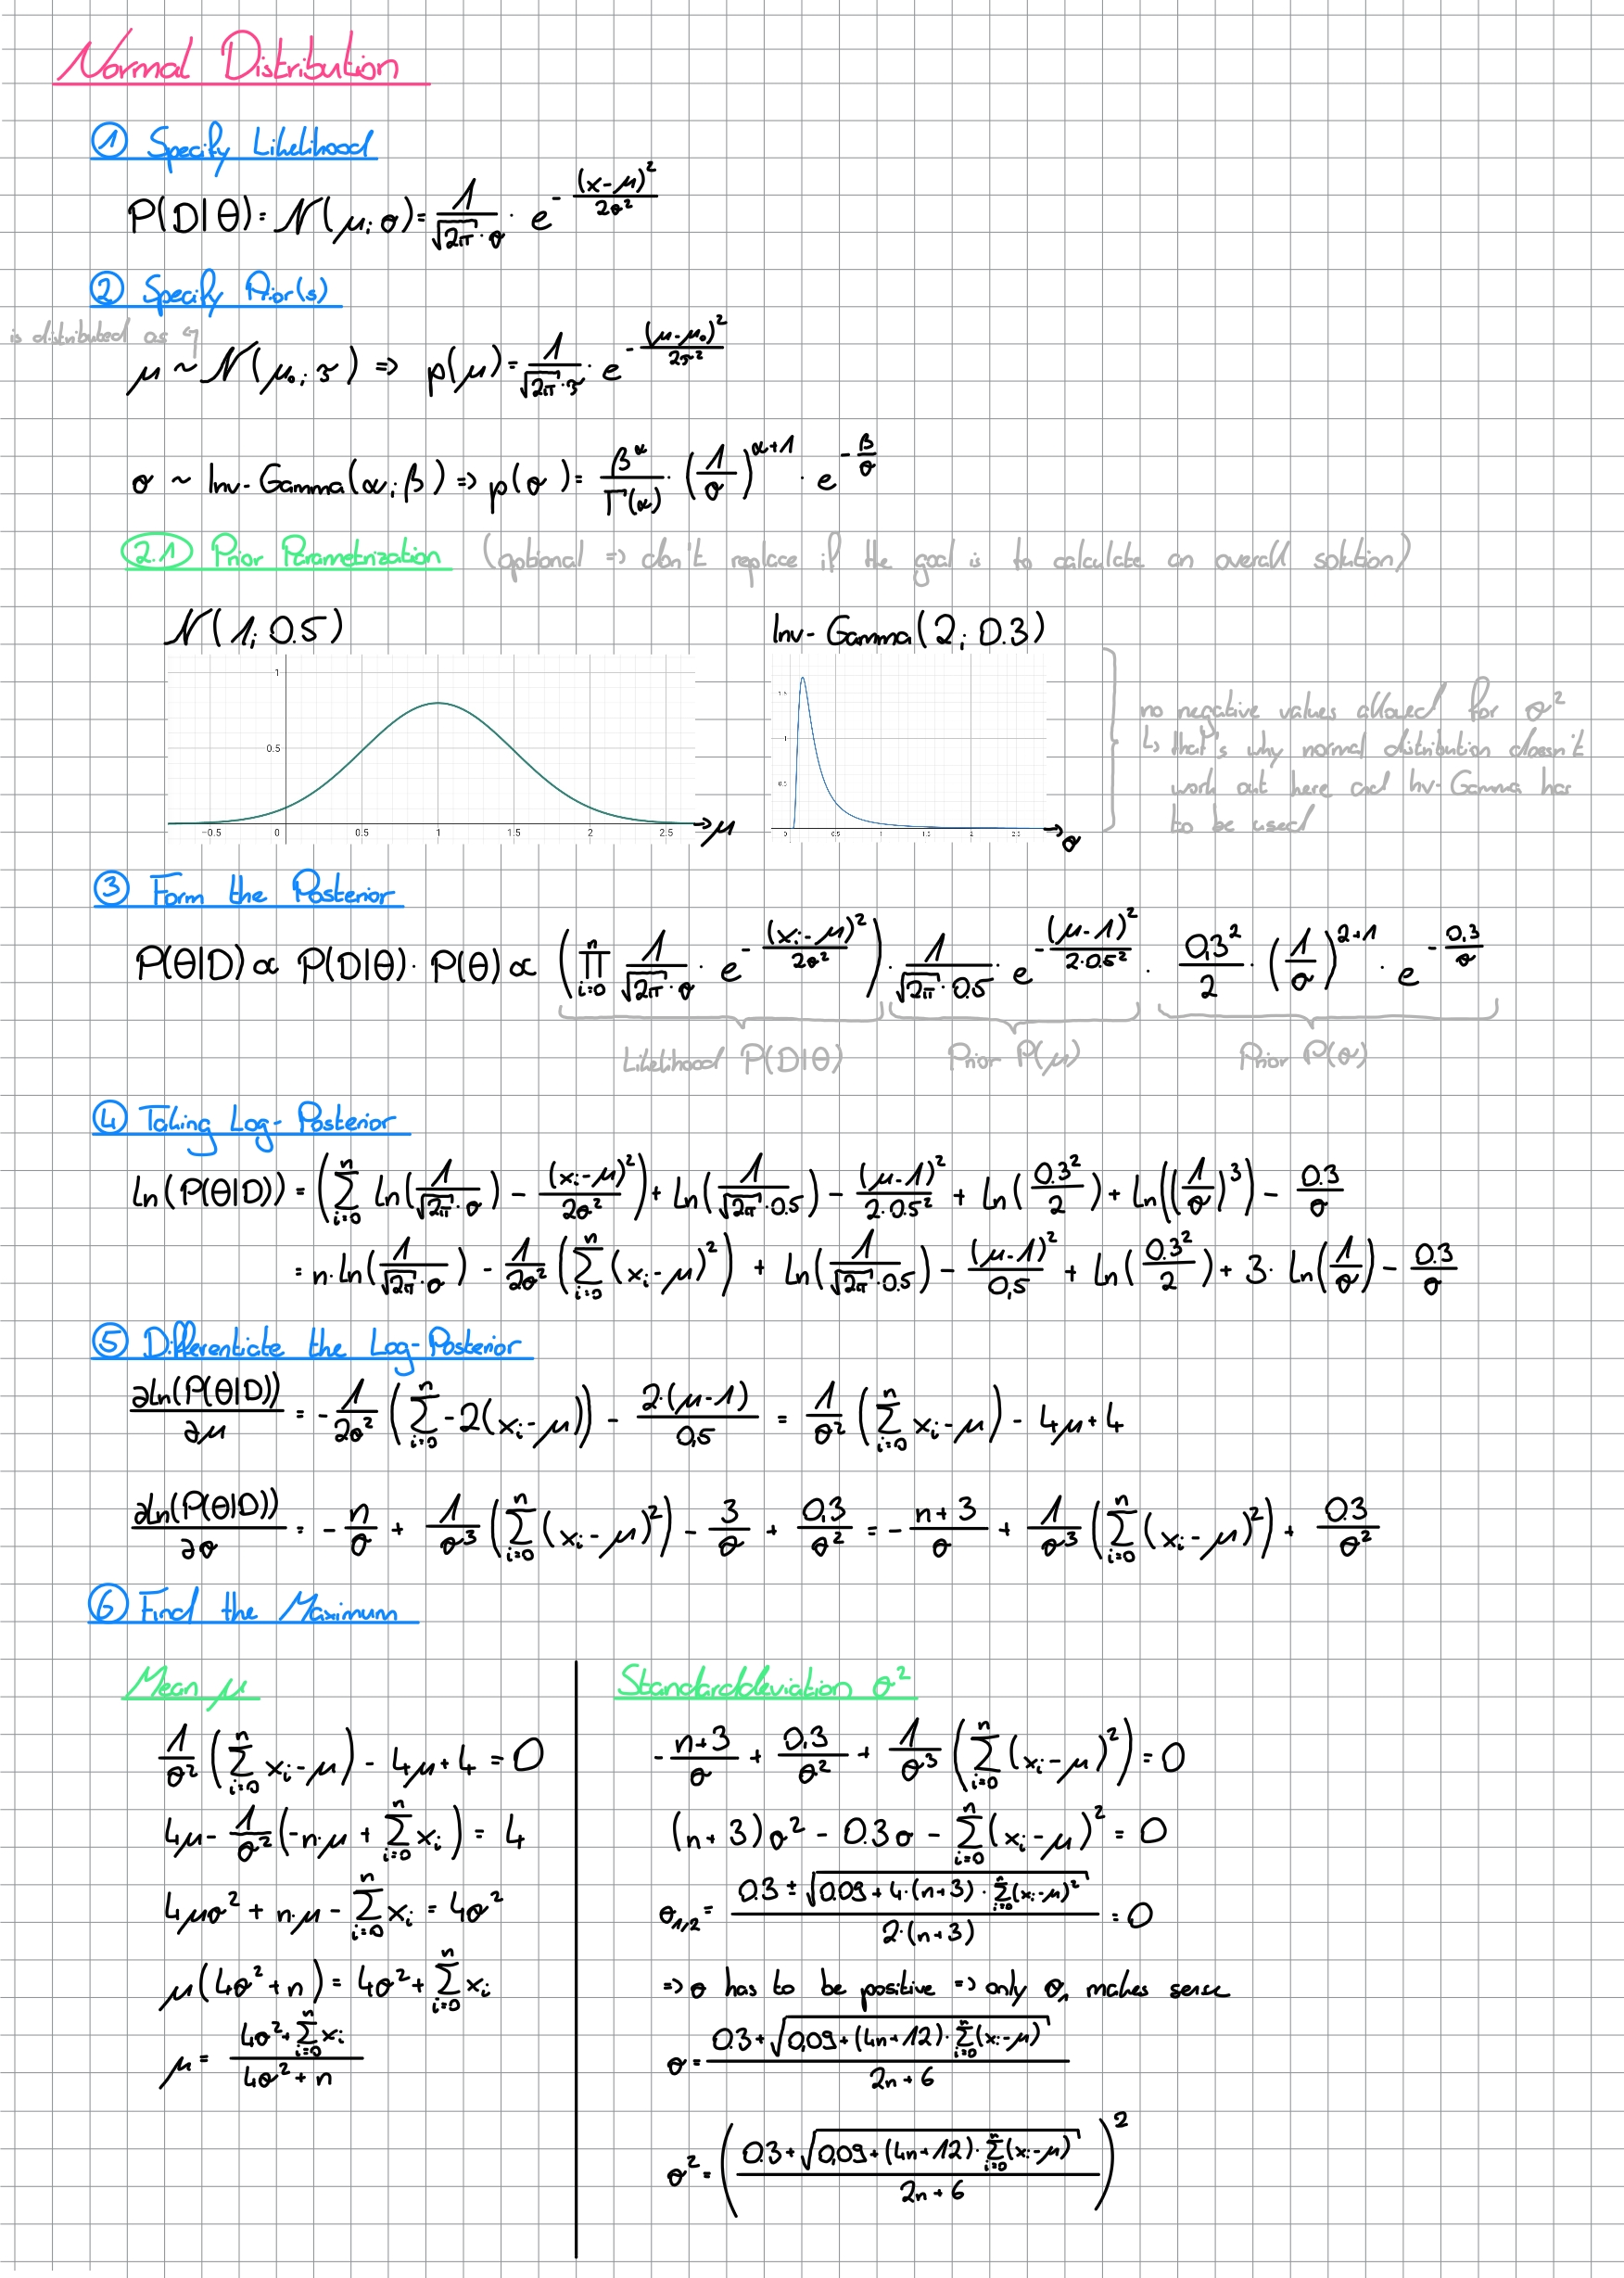

In [137]:
Image(filename='MAP.jpg')

$$
p(\mu) = \frac{1}{\sqrt{2\pi \tau^2}} \exp\left( -\frac{(\mu - \mu_0)^2}{2\tau^2} \right); \quad \text{where } \mu_0 = 1 \text{ and } \tau = 0.5
$$


In [126]:
def normal_distribution(x: np.ndarray, mu: float, std: float) -> np.ndarray:
    return (1 / np.sqrt(2 * np.pi * std)) * np.exp(-np.pow((x - mu), 2) / (2 * np.pow(std, 2)))

In [127]:
def plot_mu_prior() -> None:
    mu, std = 1, 0.5

    x = np.linspace(-2, 4, 300)
    y = normal_distribution(x, 1, 0.5)

    plt.grid(linestyle='--')
    plt.plot(x, y, label=r'$Prior: p(\mu)$')
    plt.vlines(mu, ymin=0, ymax=np.max(y), linestyles='--', color='r', label=r'$\mu_0 = $' + str(round(mu, 2)))
    plt.vlines(mu + std, ymin=0, ymax=normal_distribution(np.array([mu + std]), mu, std)[0], linestyles='--', color='orange', label=r'$\tau^{2} = $' + str(round(std, 2)))
    plt.vlines(mu - std, ymin=0, ymax=normal_distribution(np.array([mu - std]), mu, std)[0], linestyles='--', color='orange')
    plt.legend()
    plt.xlabel(r'$\mu$')
    plt.title(r'$Prior-Distribution: p(\mu)$')
    plt.show()

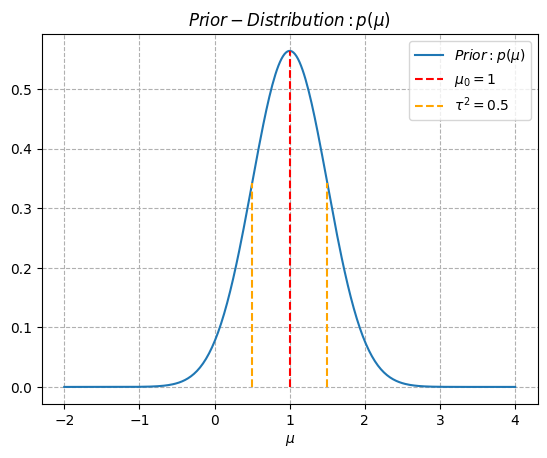

In [128]:
plot_mu_prior()

$$
p(\sigma) = \frac{\beta^{\alpha}}{\Gamma(\alpha)} (\frac{1}{\sigma})^{\alpha + 1} \exp\left(-\frac{\beta}{\sigma}\right); \quad \sigma > 0; \quad \text{where } \alpha = 2 \text{ and } \beta = 0.5
$$


In [129]:
def inverse_gamma(x: np.ndarray, alpha: float, beta: float) -> np.ndarray:
    if np.any(x <= 0):
        raise ValueError("sigma must be greater than 0 for all elements.")
    
    part1 = (beta**alpha) / gamma(alpha).pdf(alpha)  # Gamma(alpha) value
    part2 = (1 / x)**(alpha + 1)
    part3 = np.exp(-beta / x)
    
    return part1 * part2 * part3

In [130]:
def plot_sigma_prior() -> None:
    alpha, beta = 2, 0.3

    x = np.linspace(0.01, 4, 300)
    y = inverse_gamma(x, alpha, beta)

    plt.grid()
    line, = plt.plot(x, y, label=r'$Prior: p(\sigma)$')
    plt.xlabel(r'$\sigma$')
    plt.title(r'$Prior-Distribution: p(\sigma)$')
    red_patch = mpatches.Patch(color='red', label=r'$\alpha = 2$')
    green_patch = mpatches.Patch(color='green', label=r'$\beta = 0.5$')
    plt.legend(handles=[plt.Line2D([0], [0], color=line.get_color(), lw=2, label=r'$Prior: p(\sigma)$'), red_patch, green_patch])
    plt.show()

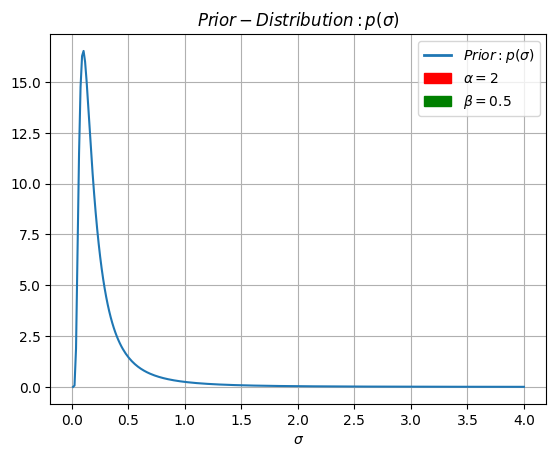

In [131]:
plot_sigma_prior()

$$\mu = \frac{4\sigma^2 + \sum_{i = 0}^{n} x_i}{4\sigma^2 + n}$$

In [132]:
def best_mu(x: np.ndarray, std: float) -> float:
    return (4 * std ** 2 + x.sum()) / (4 * std ** 2 + len(x))

$$\sigma^2 = \left( \frac{0.3 + \sqrt{0.09 + (4n + 12) \cdot \sum_{i=1}^{n} (x_i - \mu)^2}}{2n + 6} \right)^2$$


In [133]:
def best_variance(x: np.ndarray, mu: float) -> float:
    return np.pow((0.3 + np.sqrt(0.09 + (4 * len(x) + 12) * np.pow(x - mu, 2).sum())) / (2 * len(x) + 6), 2)

$$f(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)$$

In [134]:
def plot_normal_distribution(x: np.ndarray) -> None:
    estimated_std = np.std(x)
    mu = best_mu(x, estimated_std)
    var = best_variance(x, mu)
    std = np.sqrt(var)

    x_distribution = np.linspace(np.min(x) - 3, np.max(x) + 3, 300)
    y_likelihood = normal_distribution(x_distribution, np.mean(x), np.std(x))
    y_posterior = normal_distribution(x_distribution, mu, std)

    plt.figure(figsize=(8, 5))
    plt.scatter(x, np.zeros(x.shape), marker='x', label='Datapoints')
    plt.plot(x_distribution, y_likelihood, label=rf'$Likelihood \quad \mu={round(np.mean(x), 2)}; \sigma={round(np.std(x), 2)}$')
    plt.plot(x_distribution, y_posterior, label=rf'$Posterior \quad \mu={round(mu, 2)}; \sigma={round(std, 2)}$')
    plt.legend()
    plt.show()

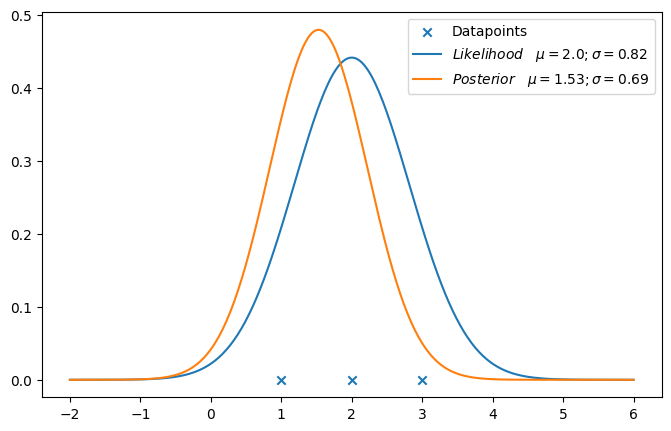

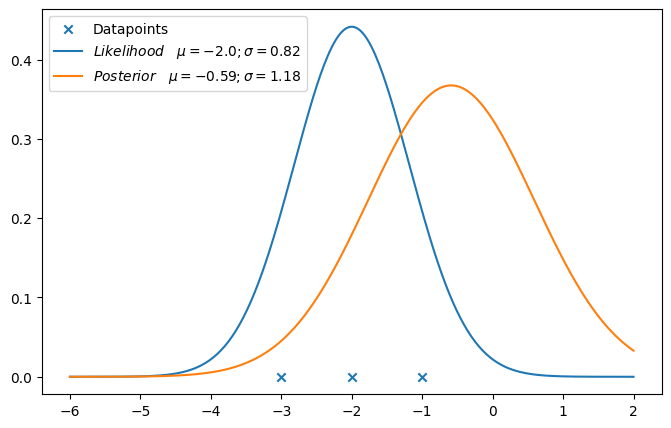

In [135]:
plot_normal_distribution(np.array([1, 2, 3]))
plot_normal_distribution(np.array([-3, -2, -1]))